In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import load_iris, load_diabetes

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# KNN

In [2]:
def euclidian_distance(a, b):
    return np.sqrt(np.sum((a-b)**2, axis=1))

    
def get_neighbors(X_train, X_test, n_neighbors):
    '''
    Get top 'n_neighbors' for each 'X_test' values.
    Return: 'neighbor_indices' of shape = (#X_test, n_neighbors)
            'neighbor_dists' of shape = (#X_test, n_neighbors)
    '''
    neighbor_indices = []
    
    # Euclidian distance from each X_test to X_trains. len(dists) = #X_test
    dists = [euclidian_distance(x_test, X_train) for x_test in X_test]
    for dist in dists:
        # dist.shape = (#X_train, )
        neighbors = sorted(enumerate(dist), key=lambda x: x[1])[:n_neighbors]
        neighbor_indices.append([neighbor[0] for neighbor in neighbors])
    
    return np.array(neighbor_indices)

In [3]:
def knn_classifier(X_train, y_train, X_test, n_neighbors=5):
    '''
    KNN Classifier for # neighbors = 'n_neighbors'
    return: 'y_pred' of shape (#X_test, )
    '''
    # Get top n_neighbors for each points of X_test
    neighbors = get_neighbors(X_train, X_test, n_neighbors=n_neighbors)
    
    # Find indices of each neighbors and select the target with highest occurance
    return np.array([np.argmax(np.bincount(y_train[neighbor])) for neighbor in neighbors])

In [4]:
def knn_regressor(X_train, y_train, X_test, n_neighbors=5):
    '''
    KNN Regressor for # neighbors = 'n_neighbors'
    return: 'y_pred' of shape (#X_test, )
    '''
    # Get top n_neighbors for each points of X_test
    neighbors = get_neighbors(X_train, X_test, n_neighbors=n_neighbors)

    # Return the target as the mean of y_train neighbors
    return np.array([y_train[neighbor].mean() for neighbor in neighbors])

# Examples

### Iris Dataset

In [5]:
iris_data = load_iris()

pd.DataFrame(iris_data.data, columns=iris_data.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
X = iris_data.data
y = iris_data.target

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train set: ')
print(X_train.shape)
print(y_train.shape)

print('\nTest set: ')
print(X_test.shape)
print(y_test.shape)

(150, 4)
(150,)
Train set: 
(120, 4)
(120,)

Test set: 
(30, 4)
(30,)


***Using Sklearn library***

In [7]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')

Accuracy score: 1.0


***Implemented KNN Classifier***

In [8]:
y_pred = knn_classifier(X_train, y_train, X_test, n_neighbors=3)

print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')

Accuracy score: 1.0


### Diabetes Dataset

In [9]:
diabetes_data = load_diabetes()

pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names).head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [10]:
X = diabetes_data.data
y = diabetes_data.target

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train set: ')
print(X_train.shape)
print(y_train.shape)

print('\nTest set: ')
print(X_test.shape)
print(y_test.shape)

(442, 10)
(442,)
Train set: 
(353, 10)
(353,)

Test set: 
(89, 10)
(89,)


***Using sklearn library***

In [11]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 3019.075505617978


***Implemented KNN Regressor***

In [12]:
y_pred = knn_regressor(X_train, y_train, X_test, n_neighbors=5)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 3019.075505617978


***Finding the best value for K***

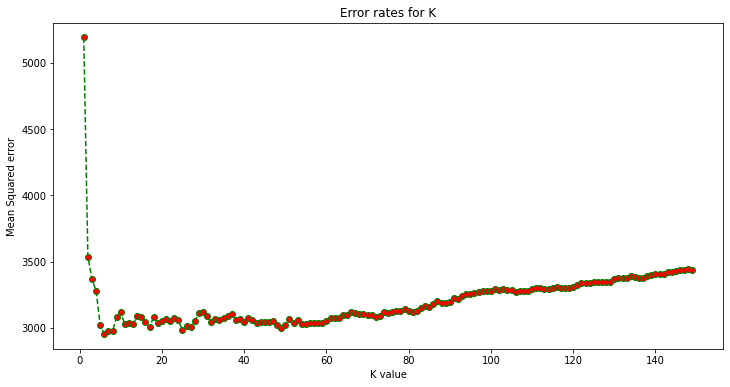

In [13]:
errors = {}
for k in range(1, 150):
    y_pred = knn_regressor(X_train, y_train, X_test, n_neighbors=k)
    errors[k] = mean_squared_error(y_test, y_pred)    # Mean Squared Error

plt.figure(figsize=(12, 6))
plt.plot(list(errors.keys()), list(errors.values()), color='green', linestyle='dashed', marker='o', markerfacecolor='red', markersize=6)
plt.title('Error rates for K')
plt.xlabel('K value')
plt.ylabel('Mean Squared error')
plt.show()

In [14]:
print(f'K with minimum MSE: {min(errors, key=lambda x: errors[x])}')

K with minimum MSE: 6
